In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
kx= np.linspace(-np.pi,np.pi,100)
ky= np.linspace(-np.pi,np.pi,41)
KX, KY = np.meshgrid(kx, ky)

In [4]:
def energy(m):
    dx=np.sin(KY)
    dy=np.sin(KX)
    dz=m-np.cos(KX)-np.cos(KY)
    E = np.sqrt(dx**2+dy**2+dz**2)
    return E

In [5]:
def wavefunction(m):
    dx=np.sin(KY)
    dy=np.sin(KX)
    dz=m-np.cos(KX)-np.cos(KY)
    E = np.sqrt(dx**2+dy**2+dz**2)
    cos_theta = dz/E
    u = np.array([
        (dx-1j*dy)/np.sqrt(dx**2+dy**2) * np.sqrt(1/2-1/2*cos_theta),
        -np.sqrt(1/2+1/2*cos_theta)
    ])
    return u

In [6]:
def berry_curvature(wf):
    wf_ij=wf
    wf_i1j=np.roll(wf_ij,1,axis=1)
    wf_ij1=np.roll(wf_ij,1,axis=2)
    wf_i1j1=np.roll(wf_i1j,1,axis=2)
    Phi=np.angle(np.einsum("ijl,ijl->jl",wf_ij, np.conj(wf_ij1)) * np.einsum("ijl,ijl->jl",wf_ij1, np.conj(wf_i1j1)) * np.einsum("ijl,ijl->jl",wf_i1j1, np.conj(wf_i1j))* np.einsum("ijl,ijl->jl",wf_i1j, np.conj(wf_ij)))
    return Phi

In [19]:
wf=wavefunction(1)
Phi=berry_curvature(wf)

(-3.141592653589793, 3.141592653589793)

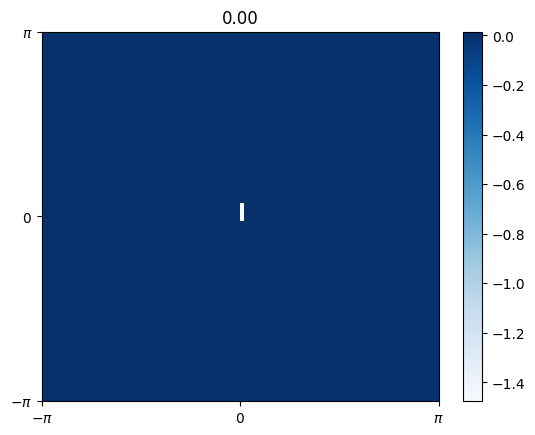

In [18]:
fig, ax = plt.subplots()
im=ax.pcolormesh(kx,ky,Phi,cmap='Blues',)
# vmin=-np.pi,vmax=np.pi
plt.colorbar(im)
ax.set_title(f'{np.sum(Phi)/(2*np.pi):.2f}')
ax.set_xticks([-np.pi,0,np.pi],labels=[r'$-\pi$',r'$0$',r'$\pi$'])
ax.set_yticks([-np.pi,0,np.pi],labels=[r'$-\pi$',r'$0$',r'$\pi$'])
ax.set_xlim(-np.pi,np.pi)
ax.set_ylim(-np.pi,np.pi)


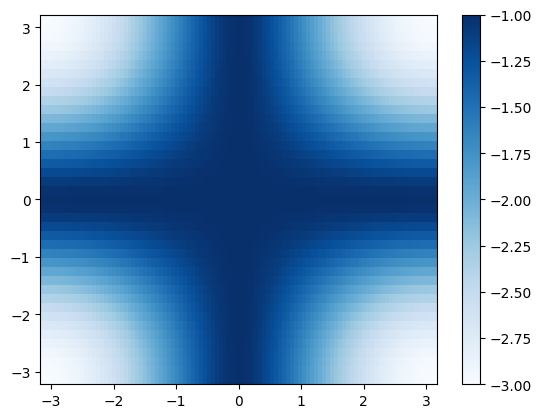

In [14]:
fig,ax = plt.subplots()
im=ax.pcolormesh(kx,ky,-energy(1.),cmap='Blues')
plt.colorbar(im)


In [100]:
Phi

array([[ 0.00000000e+00, -1.09848109e-18, -2.19365749e-18, ...,
        -2.19268908e-18, -2.19365749e-18, -1.09848109e-18],
       [-1.09848109e-18, -1.44405845e-03, -1.44397002e-03, ...,
        -1.44333884e-03, -1.44397002e-03, -1.44405845e-03],
       [-2.19365749e-18, -1.44397002e-03, -1.44373341e-03, ...,
        -1.44279546e-03, -1.44373341e-03, -1.44397002e-03],
       ...,
       [-2.19268908e-18, -1.44333884e-03, -1.44279546e-03, ...,
        -1.44122270e-03, -1.44279546e-03, -1.44333884e-03],
       [-2.19365749e-18, -1.44397002e-03, -1.44373341e-03, ...,
        -1.44279546e-03, -1.44373341e-03, -1.44397002e-03],
       [-1.09848109e-18, -1.44405845e-03, -1.44397002e-03, ...,
        -1.44333884e-03, -1.44397002e-03, -1.44405845e-03]])

In [99]:
np.sum(Phi)/(2*np.pi)

1.0

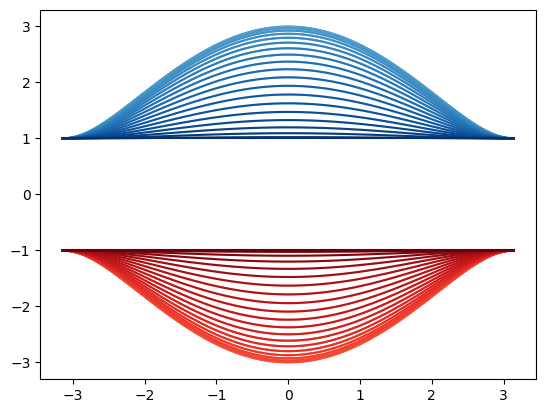

In [7]:
fig,ax=plt.subplots()
blues=plt.cm.Blues(np.linspace(0.1,1,ky.shape[0]))
reds = plt.cm.Reds(np.linspace(0.1,1,ky.shape[0]))
for idx in range(ky.shape[0]):
    ax.plot(kx,energy(-1)[idx,:],label=f'ky={ky[idx]:.2f}',color=blues[idx])
    ax.plot(kx,-energy(-1)[idx,:],label=f'ky={ky[idx]:.2f}',color=reds[idx])

    

In [180]:
ky[15:25]

array([-0.78539816, -0.62831853, -0.4712389 , -0.31415927, -0.15707963,
        0.        ,  0.15707963,  0.31415927,  0.4712389 ,  0.62831853])

In [16]:
mu_list=np.linspace(-3,3,100)
gap_list=[energy(mu).min() for mu in mu_list]

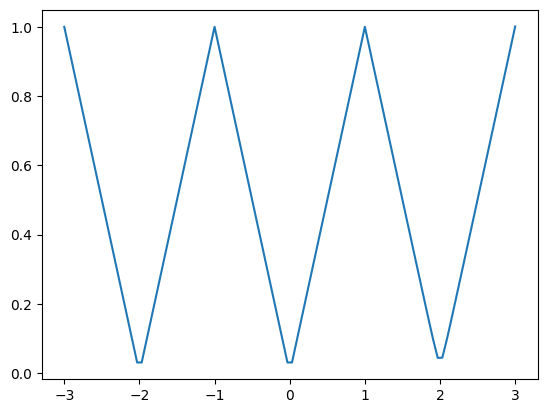

In [17]:
plt.plot(mu_list,gap_list)

# Edge state

In [34]:
# mu=1
# Nx=3
# ky=0
def get_edge_ham(mu,Nx,ky):
    ii=np.eye(Nx)
    nn=np.diag(np.ones(Nx-1),1)
    sigma_z=np.array([[1,0],[0,-1]])
    sigma_x=np.array([[0,1],[1,0]])
    sigma_y=np.array([[0,-1j],[1j,0]])
    h1 = np.kron(ii,sigma_z) * (mu-np.cos(ky))
    h2 = np.kron(nn,sigma_z) 
    h2 = (h2 + h2.T.conj())/2
    h3 = np.kron(nn,sigma_x)*1j
    h3 = (h3 + h3.T.conj())/2
    h4= np.kron(ii,sigma_y)*np.sin(ky)
    H = h1+h2+h3+h4
    vals =np.linalg.eigvalsh(H)


    return np.sort(vals)

In [68]:
ky_list = np.linspace(-np.pi,np.pi,41)
en = [get_edge_ham(mu=-1,Nx=30,ky=ky) for ky in ky_list]

Text(0, 0.5, 'Energy')

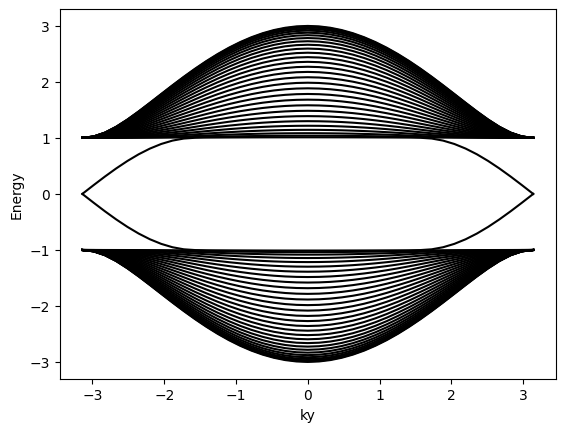

In [69]:
plt.plot(ky_list,en,color='k')
plt.xlabel('ky')
plt.ylabel('Energy')

In [32]:
vals =np.linalg.eigvalsh(ham)

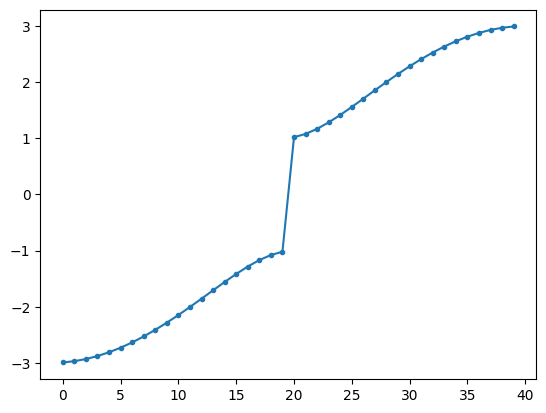

In [33]:
plt.plot(vals,'.-')